In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

### Reading and Inspection


In [3]:
df = pd.read_csv('Country-data.csv') # Reading Application dataframe as df
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


####      Inspect the data frames by printing it's shape variable types and mean. min, max, std 

In [4]:
# Check the column wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Get the summary of the dataframe using 'describe()'
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Get the shape of the dataset
df.shape

(167, 10)

In [7]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No ``NULL`` values are observed.


In [8]:
# Get the duplicates values
df.loc[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


No ``duplicate`` values in the dataset


## Data Preparation

Converting ``exports``,``imports`` and ``health`` spending percentages to absolute values.

In [9]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports']* df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis

#### Univariate Analysis

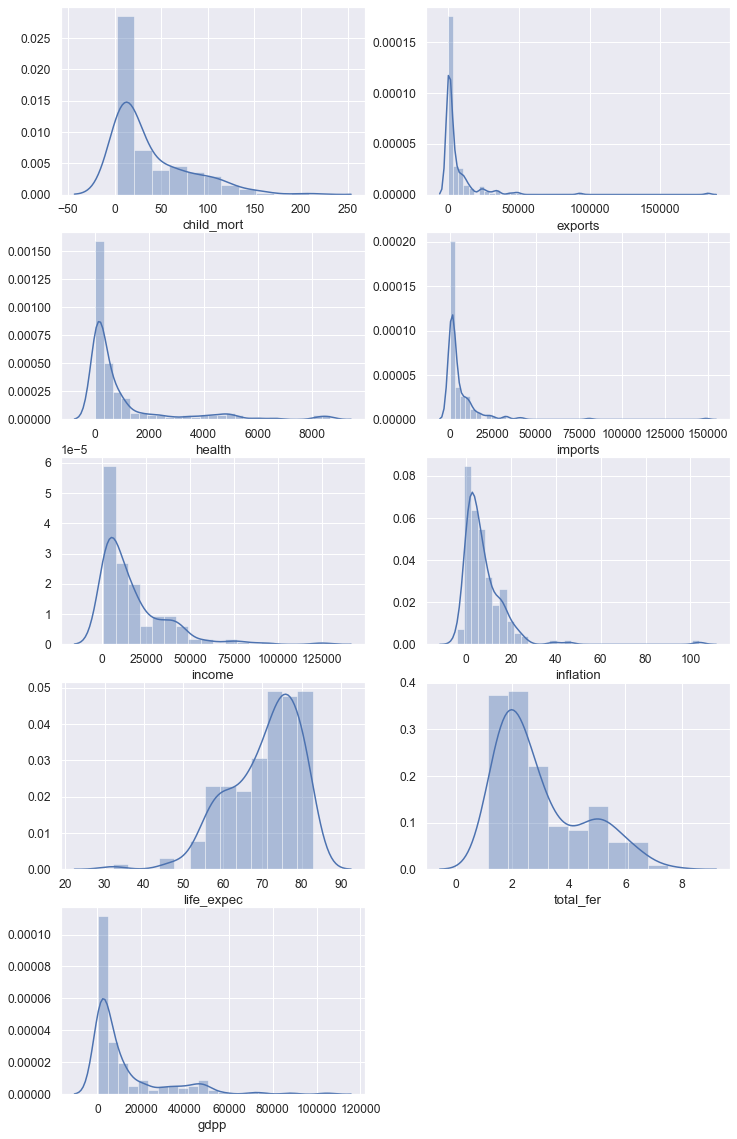

In [10]:
plt.figure(figsize=(12,20))
sns.set(font_scale = 1.1)
cols = df.columns[1:]
for i in enumerate(cols):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

Inference :
- All the variables are not Normally distributed
-  Most of the variables are Positively skewd like child_mort, exports, health, income, total_fer, gdpp
- The variables are Negatively skewd is life_expec

### Finding Outliers
- Here we try to finding any outliers are present or not 
- We need to treat the outliers in proper way because as we are going to implement Clustering algorithm, so that outliers can be a major issue

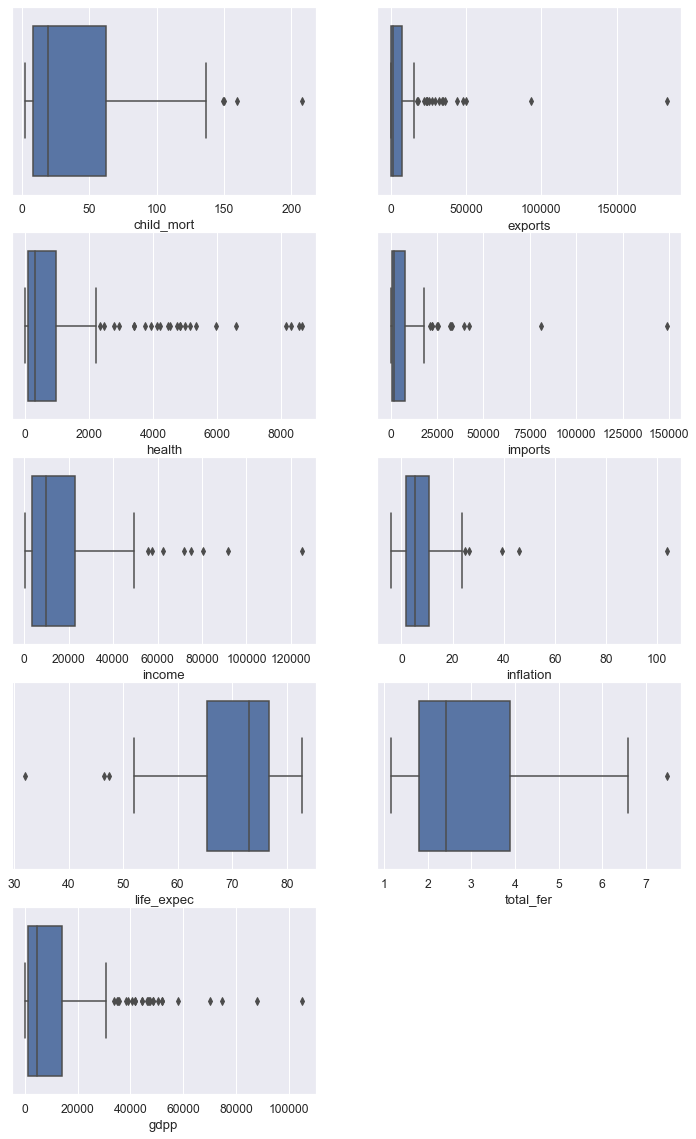

In [11]:
# Here we use boxplot for finding the outliers
plt.figure(figsize = (12,20))
cols = df.columns[1:]
for i in enumerate(cols):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(df[i[1]])
plt.show()

- Here we treat the lower end value of child_mortality
- And treat the upper end values except the child_mortality
- We did not use the upper end values of child_mortality because upper end values show the countries that are in the direst need of aid. 

In [12]:
#removing upper end outliers for columns other than mortality
for col in cols:
    
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    if col != 'child_mort':
        df = df[(df[col] <= Q3 + 1.5*IQR)]   
    else:
        df = df[(df[col] >= Q1 - 1.5*IQR)]

After treating the outliers we didn't lose much data

### Scaling the data

In [13]:
# Here we use StandardScaler to scale the data 
scaler = StandardScaler()   # Create a scaling object
scaled_df = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:])) # Scale these variables using 'fit_transform'
scaled_df.columns = df.columns[1:]
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.303466,-0.617617,-0.562023,-0.648685,-0.892037,0.289329,-1.612381,1.911315,-0.702455
1,-0.545781,-0.496897,-0.431204,-0.422310,-0.367608,-0.370665,0.666389,-0.870331,-0.483620
2,-0.276937,-0.434045,-0.478624,-0.498742,-0.180401,1.177320,0.689063,-0.043175,-0.460727
3,2.027084,-0.380154,-0.528049,-0.483915,-0.621628,2.017312,-1.170232,2.138116,-0.518267
4,-0.704073,-0.008898,-0.160414,0.254178,0.210399,-0.777327,0.723074,-0.550142,0.018150


#### Here we use ``Hopkins statistics`` to check the dataset is suitable for clustering or not.

In [14]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
round(100*(hopkins(scaled_df)))

91.0

Inference:
from the above ``Hopkins score`` is good for Clustering.

#### Finding the Optimal number of Clusters

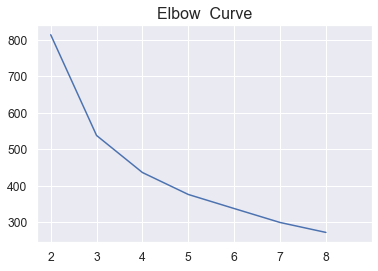

In [16]:
#  Elbow Curve to get the right number of Clusters//SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.title('Elbow  Curve', fontsize = 16)
plt.xticks([0,1,2,3,4,5,6,7],labels=['2','3','4','5','6','7','8'])
plt.show()

from the above ``elbow curve`` we can choose that the number of cluster should be ``3`` or ``4`` but we should go with ``3``

#### Silhoutte Analysis

In [17]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47582164792275383
For n_clusters=3, the silhouette score is 0.3990749120733062
For n_clusters=4, the silhouette score is 0.3881107410902387
For n_clusters=5, the silhouette score is 0.3580795064769832
For n_clusters=6, the silhouette score is 0.29383168249414476
For n_clusters=7, the silhouette score is 0.2926560582836891
For n_clusters=8, the silhouette score is 0.31830295464639236


we can take clusters = 3 as per the ``Silhouette score``

In [18]:
# Final Model with k = 3
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=100)

In [19]:
cluster_labels = kmeans.labels_
cluster_labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 1])

In [20]:
# creating copy of the primary dataframe for 
df_copy=df.copy()
df_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [21]:
# Assign the Label
df_copy['K-Means_Clusters']= cluster_labels
df_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [22]:
# Cluster counts 
df_copy['K-Means_Clusters'].value_counts()

0    89
1    47
2    27
Name: K-Means_Clusters, dtype: int64

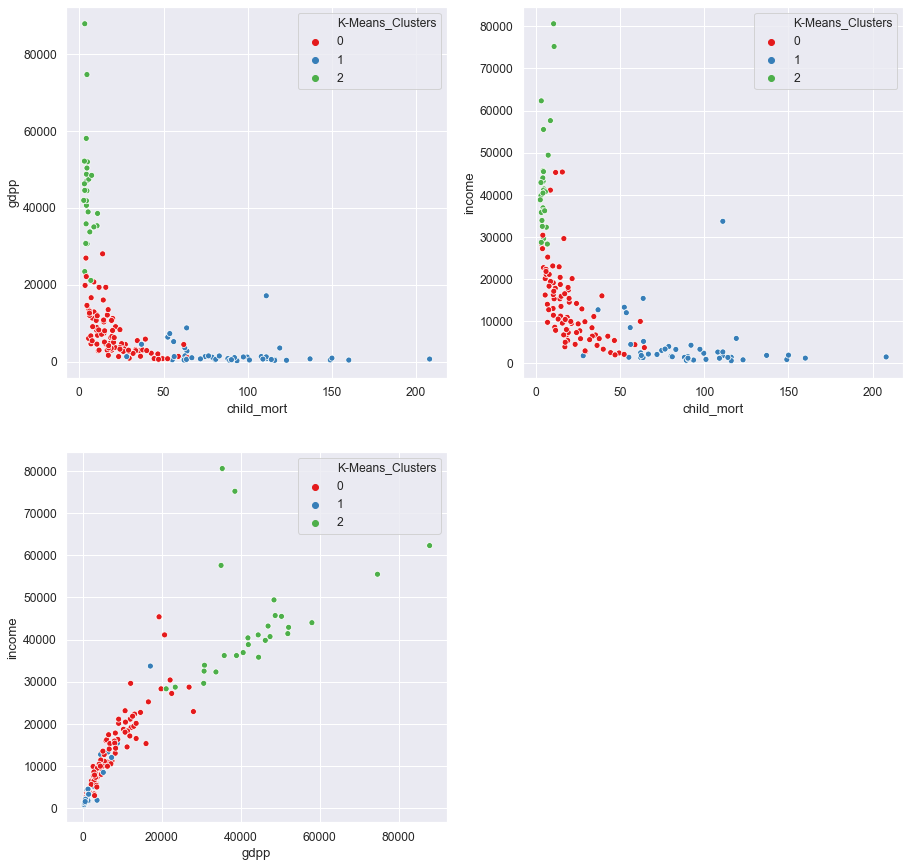

In [23]:
# plotting the K-Means Clusters using Scatter plot

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='gdpp', hue='K-Means_Clusters', data=df_copy, palette='Set1')
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort',y='income', hue='K-Means_Clusters', data=df_copy, palette= 'Set1')
plt.subplot(2,2,3)
sns.scatterplot(x='gdpp',y='income', hue='K-Means_Clusters', data=df_copy, palette= 'Set1')
plt.show()

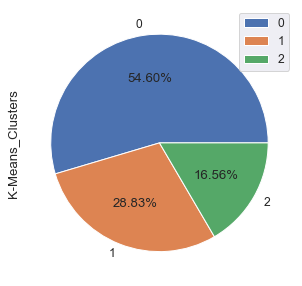

In [24]:
# Plotting the value_counts got after applying the K-Means Cluster labels
plt.figure(figsize= (8, 5))
df_copy['K-Means_Clusters'].value_counts().plot(kind= 'pie', legend = True, autopct='%1.2f%%',labels=[0,1,2], shadow=False)
plt.show()

Here we got
- The value of Cluster is high which is 54.69% which is 89
- The Cluster 1 contains 28.83% which is 47
- The Cluster 2 contains 16.56% which is 27

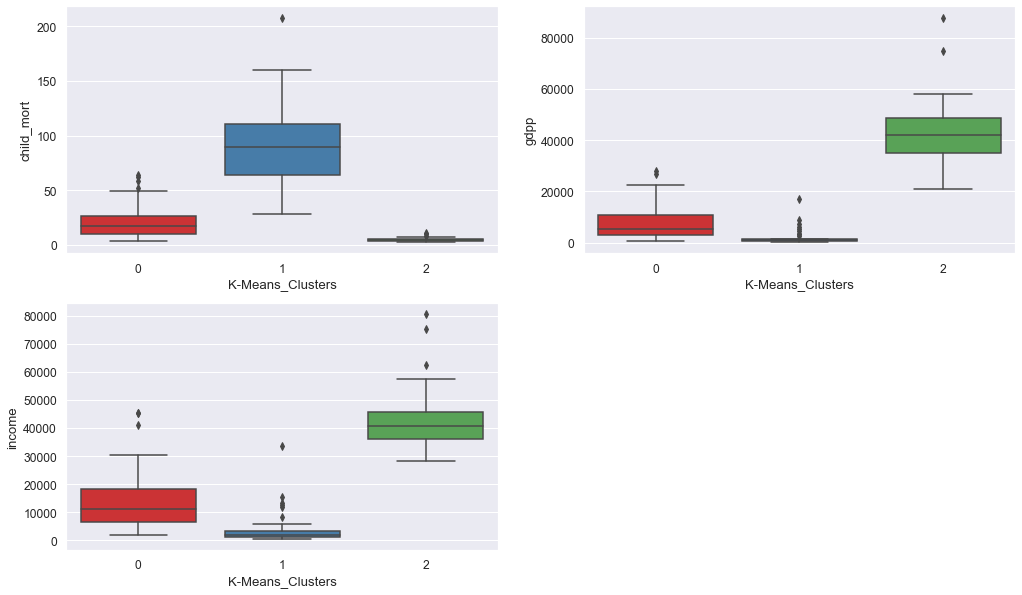

In [25]:
# Box plot on Original attributes to visualize the spread of the data.

features = ['child_mort', 'gdpp', 'income']
plt.figure(figsize = (17, 10))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = df_copy['K-Means_Clusters'], y = df_copy[i[1]], palette = 'Set1')
plt.show()

#### Insights
- Here Cluster 1 represents High child_mortality, low income, low gdpp
- Here Cluster 2 represents Those countries have high income and high gdpp has low child_mortality
- The number of ``child_mortality`` is higher in cluster 1, medium in cluster 0 and less in cluster 2
- The value of ``gdpp`` is higher in cluster 2, medium in cluster 0 and less in cluster 1
- The ``income`` is higher in cluster 2, medium in cluster 0 and less in cluster 1

### Hierarchical Clustering

#### Single Linkage

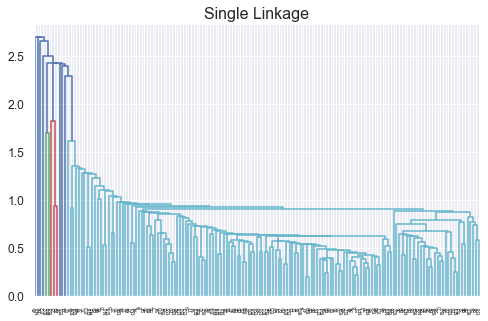

In [26]:
plt.figure(figsize=(8, 5))
merging=linkage(scaled_df,method='single')
plt.title('Single Linkage', fontsize=16)
dendrogram(merging)
plt.show()

#### Complete Linkage

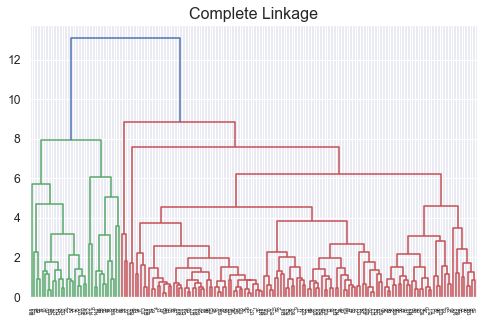

In [27]:
plt.figure(figsize=(8,5))
merging=linkage(scaled_df,method='complete')
plt.title('Complete Linkage', fontsize=16)
dendrogram(merging)
plt.show()

In [28]:
# Clusters
cluster_labels = cut_tree(merging,height=8).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# Assign the Label
df_copy['Hierarchical_Clusters'] = cluster_labels
df_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Clusters,Hierarchical_Clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [30]:
# Cluster counts 
df_copy['Hierarchical_Clusters'].value_counts()

0    127
1     33
2      3
Name: Hierarchical_Clusters, dtype: int64

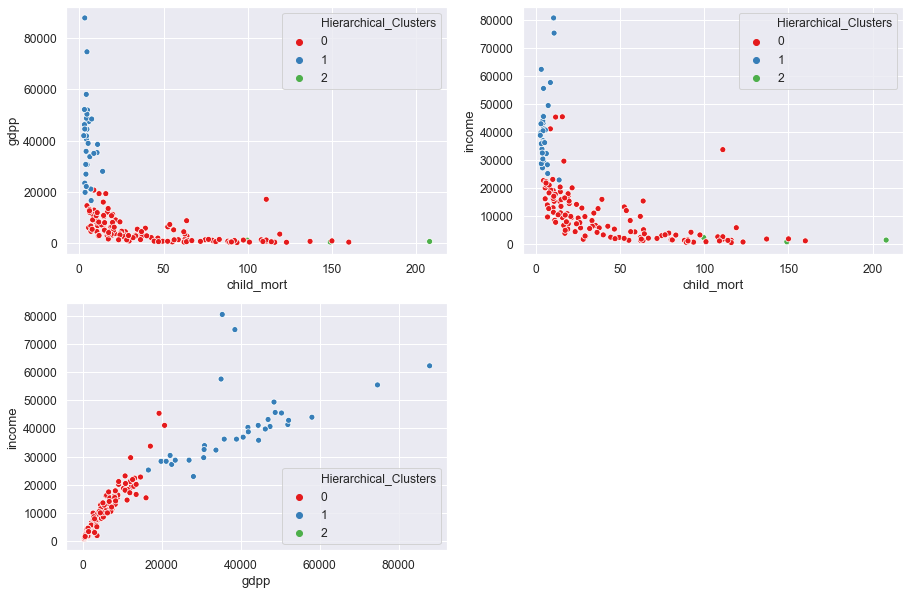

In [31]:
# plotting the Hierarchical Clusters using Scatter plot

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='gdpp', hue='Hierarchical_Clusters', data=df_copy, palette='Set1')
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort',y='income', hue='Hierarchical_Clusters', data=df_copy, palette= 'Set1')
plt.subplot(2,2,3)
sns.scatterplot(x='gdpp',y='income', hue='Hierarchical_Clusters', data=df_copy, palette= 'Set1')
plt.show()

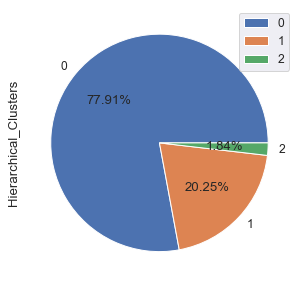

In [32]:
# Plotting the value_counts got after applying the K-Means Cluster labels
plt.figure(figsize= (8,5))
df_copy['Hierarchical_Clusters'].value_counts().plot(kind= 'pie', legend = True, autopct='%1.2f%%',labels=[0,1,2], shadow=False)
plt.show()

Here we got
- The value of Cluster is high which is 77.91% 
- The Cluster 1 contains 20.25%
- The Cluster 2 contains very less amount 1.84%

In [33]:
# Cluster counts 
df_copy['Hierarchical_Clusters'].value_counts()

0    127
1     33
2      3
Name: Hierarchical_Clusters, dtype: int64

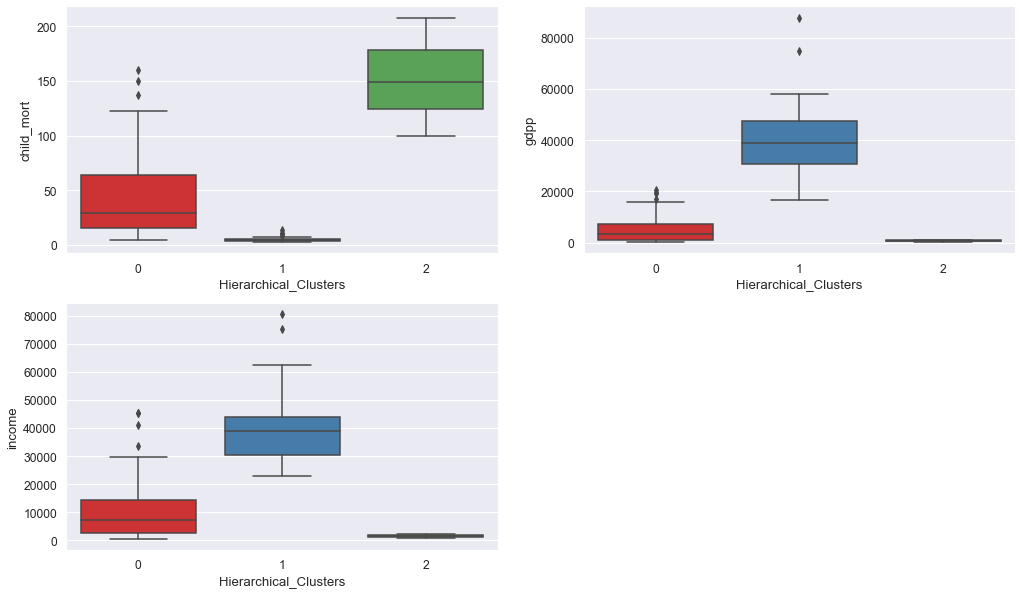

In [34]:
# plotting the Cluster_labels
features = ['child_mort', 'gdpp', 'income']
plt.figure(figsize = (17, 10))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = df_copy['Hierarchical_Clusters'], y = df_copy[i[1]], palette = 'Set1')
plt.show()

#### Insights
- Here cluster 2 represents high child_mortality and low income, low gdpp
- Here cluster 1 represents High income and high gdpp those countries have low child_mortality
- The number of ``child_mortality`` is higher in cluster 2, medium in cluster 0 and less in cluster 1
- The value of ``gdpp`` is higher in cluster 1, medium in cluster 0 and less in cluster 2
- The ``income`` is higher in cluster 1, medium in cluster 0 and less in cluster 

#### Sorting with respect to child_mort, gdpp, income using both K-Means 

In [35]:
# In K-Means clustering cluster 1 represents Low income, Low gdpp, High child mortality

country_aid_df=pd.DataFrame((df_copy[df_copy['K-Means_Clusters']==1]))
final_country=country_aid_df.sort_values(by=['gdpp', 'child_mort' ,'income'] ,ascending=[True,False,True]).head()
final_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Clusters,Hierarchical_Clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0


- The above countries have low ``income``, low ``gdpp`` and high ``Child_mortality``
- we got these countries by using ``K-Means Clustering`` which are in the direst need of aid. 
- Those top 5 countries are ``Burundi``, ``Liberia``, ``Congo, Dem. Rep.``,``Niger`` and ``Sierra Leone``

#### Sorting with respect to child_mort, gdpp, income using Hierarchical Clustering

In [36]:
# In Hierarchical clustering cluster 2 represents Low income, Low gdpp, High child mortality

country_aid_df1=pd.DataFrame((df_copy[df_copy['Hierarchical_Clusters']==2]))
final_country1=country_aid_df1.sort_values(by=['gdpp', 'child_mort' ,'income'] ,ascending=[True,False,True]).head()
final_country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Clusters,Hierarchical_Clusters
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1,2
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1,2
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170,1,2


- The above countries have low ``income``, low ``gdpp`` and high ``Child_mortality``
- we got these countries by using ``Hierarchical_Clusters`` which are in the direst need of aid. 
- Those top countries are ``Central African Republic``, ``Haiti``, ``Lesotho`` as per the Hierarchical Clustering

### Conclusion

The countries that require help the most are listed below:

``Burundi``, ``Liberia``, ``Congo, Dem. Rep.``,``Niger``,``Sierra Leone`` as per the K-Means Clustering
#### These countries have:

- very low rate of net income and gdpp, 
- very high rate of measurement of the annual growth rate, number of children that would be born and child mortality rate.

- It is clear that these countries require very quick aid in terms of money, education and services.